# EDA 
In this project, we will try to give answers to a set of questions that may be relevant when analyzing banking data:

1.  What is the share of clients attracted in our source data?
2.  What are the mean values ​​of numerical features among the attracted clients?
3.  What is the average call duration for the attracted clients?
4.  What is the average age among the attracted and unmarried clients?
5.  What is the average age and call duration for different types of client employment?

In addition, we will make a visual analysis in order to plan marketing banking campaigns more effectively.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("Dataset/bank-dataset-use-for-marketing.csv",sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [16]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [19]:
df.shape

(41188, 21)

 ## What is the share of clients attracted in our source data?

In [64]:
df["y_class"].mean()*100

11.265417111780131

In [65]:
(df.loc[df["y"]=="yes"].shape[0]*100)/df.shape[0]

11.26541711178013

##  What are the mean values ​​of numerical features among the attracted clients?

In [66]:
df.loc[df["y"] == "yes"]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_class
75,41,blue-collar,divorced,basic.4y,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
83,49,entrepreneur,married,university.degree,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
88,49,technician,married,basic.9y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
129,41,technician,married,professional.course,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
139,45,blue-collar,married,basic.9y,unknown,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41174,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,...,1,6,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,...,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes,1
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,1


In [67]:
df.loc[df["y"] == "no"].shape

(36548, 22)

## What are the mean values ​​of numerical features among the attracted clients?


In [80]:
df.loc[df["y"] == "yes"].describe().loc[df.loc[df["y"] == "yes"].describe().index=="mean"]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_class
mean,40.913147,553.191164,2.051724,792.03556,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,1.0


In [82]:
df.loc[df["y"] == "yes"].describe().loc[df.loc[df["y"] == "yes"].describe().index=="mean"].to_csv("tables/mean_features.csv")

In [83]:
df.loc[df["pdays"]!=999]["pdays"].mean()

6.014521452145215

In [70]:
df.loc[df["y"] == "no"].describe().loc[df.loc[df["y"] == "no"].describe().index=="mean"]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_class
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.1666,0.0


 ## What is the average call duration for the attracted clients?

In [71]:
df.loc[df["y"] == "yes"].describe().loc[df.loc[df["y"] == "yes"].describe().index=="mean"]["duration"]

mean    553.191164
Name: duration, dtype: float64

## What is the average age among the attracted and unmarried clients?

In [72]:
np.mean((df.loc[df["y"] == "yes"].loc[df["marital"] == "single"]["age"]))

31.348765432098766

## What is the average age and call duration for different types of client employment?

In [73]:
df["job"].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [74]:
df.groupby(["job"])[["age","duration"]].mean().to_csv("age_duration_by_job.csv")

In [75]:
df1 = pd.read_csv("age_duration_by_job.csv")

In [ ]:

    print(i)

# Visualization

In [76]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_class
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


<AxesSubplot: >

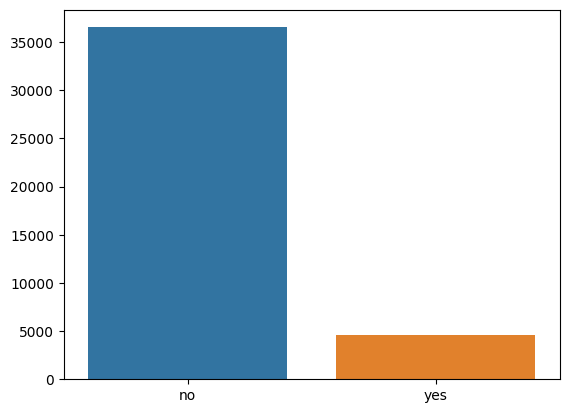

In [77]:
sns.barplot(x=df["y"].value_counts().index,y=df["y"].value_counts().values)

In [78]:
df.groupby(["job"])["y"].value_counts()

job            y  
admin.         no     9070
               yes    1352
blue-collar    no     8616
               yes     638
entrepreneur   no     1332
               yes     124
housemaid      no      954
               yes     106
management     no     2596
               yes     328
retired        no     1286
               yes     434
self-employed  no     1272
               yes     149
services       no     3646
               yes     323
student        no      600
               yes     275
technician     no     6013
               yes     730
unemployed     no      870
               yes     144
unknown        no      293
               yes      37
Name: y, dtype: int64

<AxesSubplot: xlabel='job,y'>

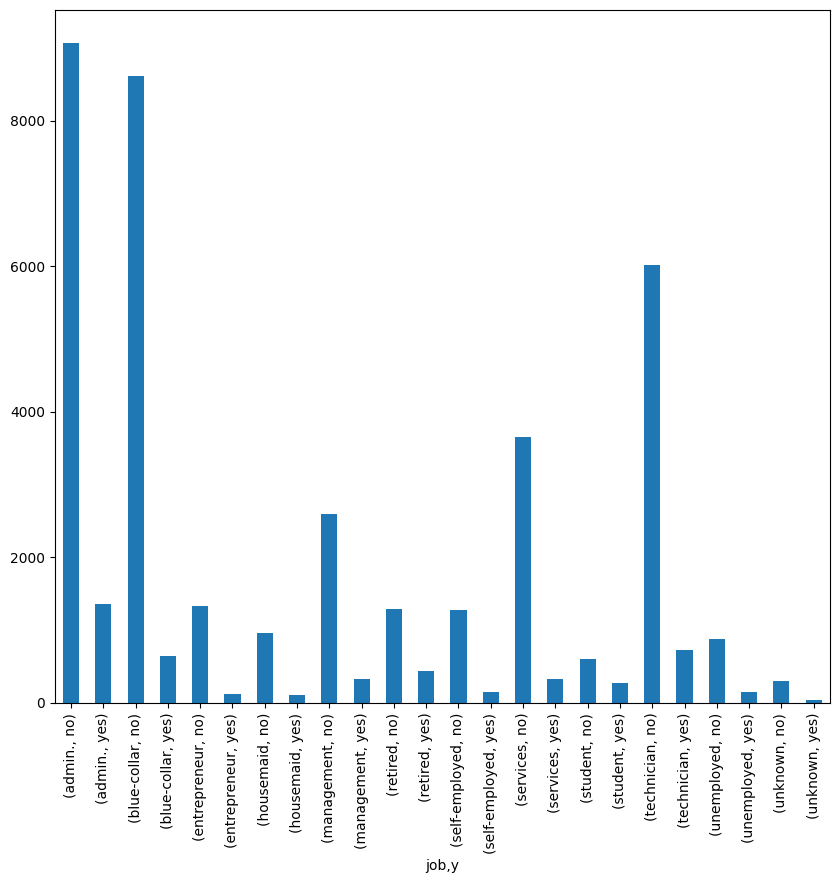

In [79]:
plt.figure(figsize=(10,9))
df.groupby(["job"])["y"].value_counts().plot(kind="bar")

In [21]:
df["y_class"] = df["y"].map({"yes":1,"no":0})

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\1686268148.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

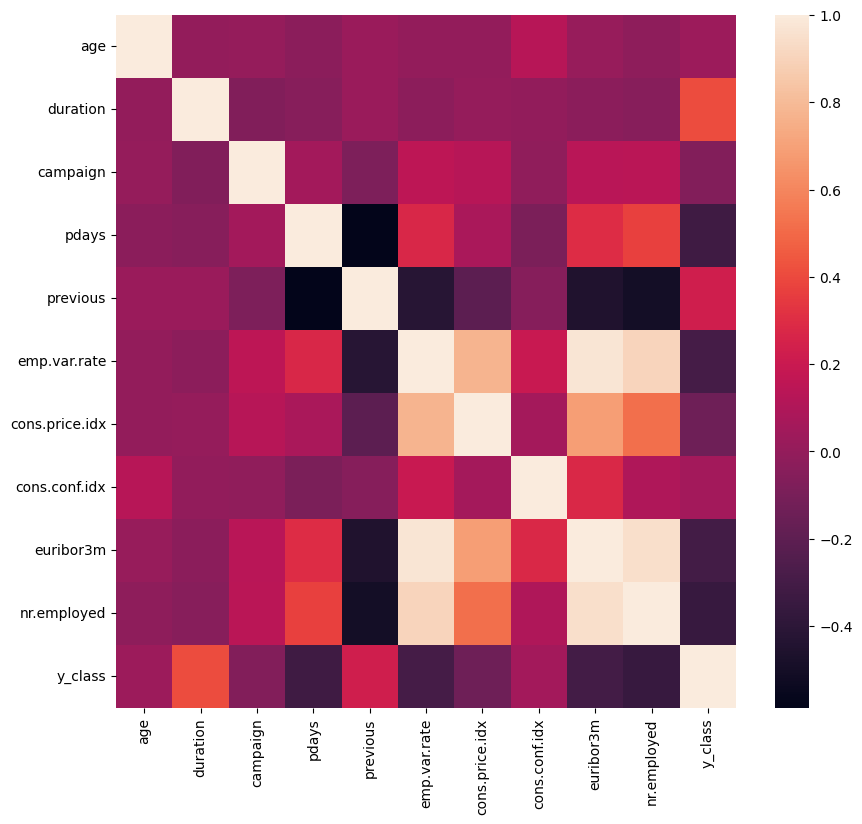

In [22]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr())

<AxesSubplot: ylabel='duration'>

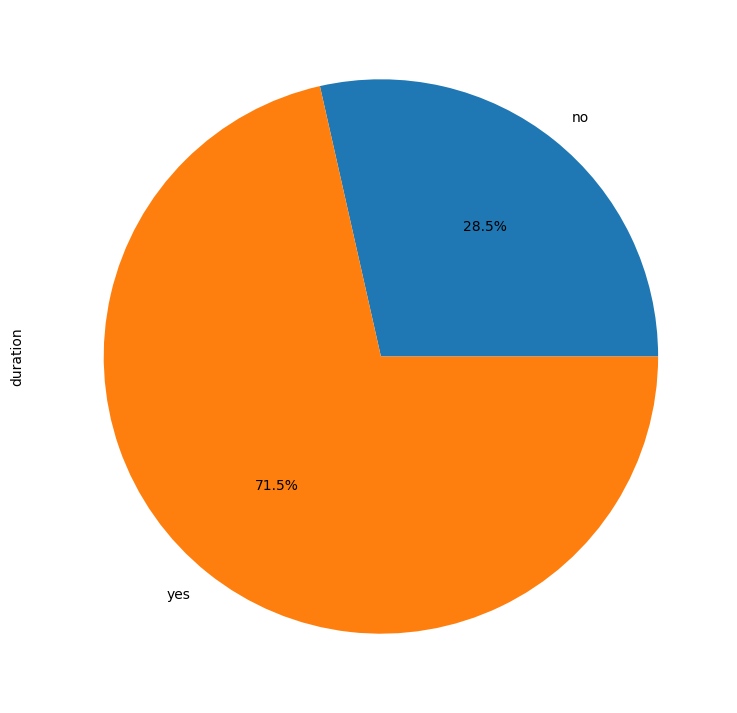

In [23]:
plt.figure(figsize=(10,9))
df.groupby(["y"])["duration"].mean().plot(kind='pie',autopct='%1.1f%%')

In [24]:
df["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int64)

<AxesSubplot: ylabel='previous'>

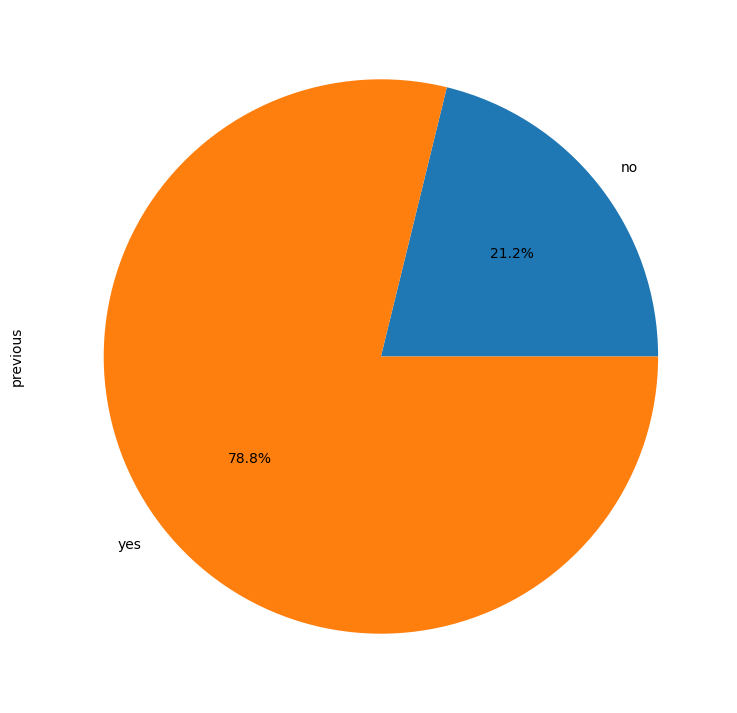

In [25]:
plt.figure(figsize=(10,9))
df.groupby(["y"])["previous"].mean().plot(kind="pie",autopct='%1.1f%%')

<AxesSubplot: ylabel='education'>

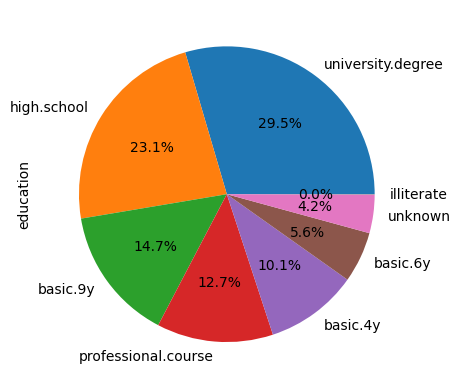

In [26]:
df["education"].value_counts().plot(kind='pie',autopct='%1.1f%%')

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\4136255934.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["job"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='job'>

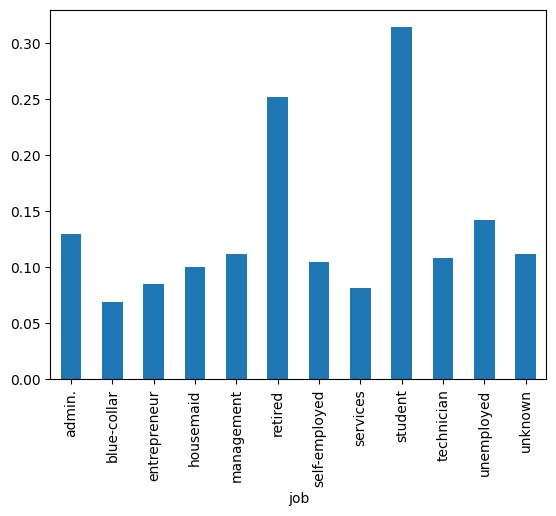

In [27]:
df.groupby(["job"]).mean()["y_class"].plot(kind="bar")

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\128374634.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["education"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='education'>

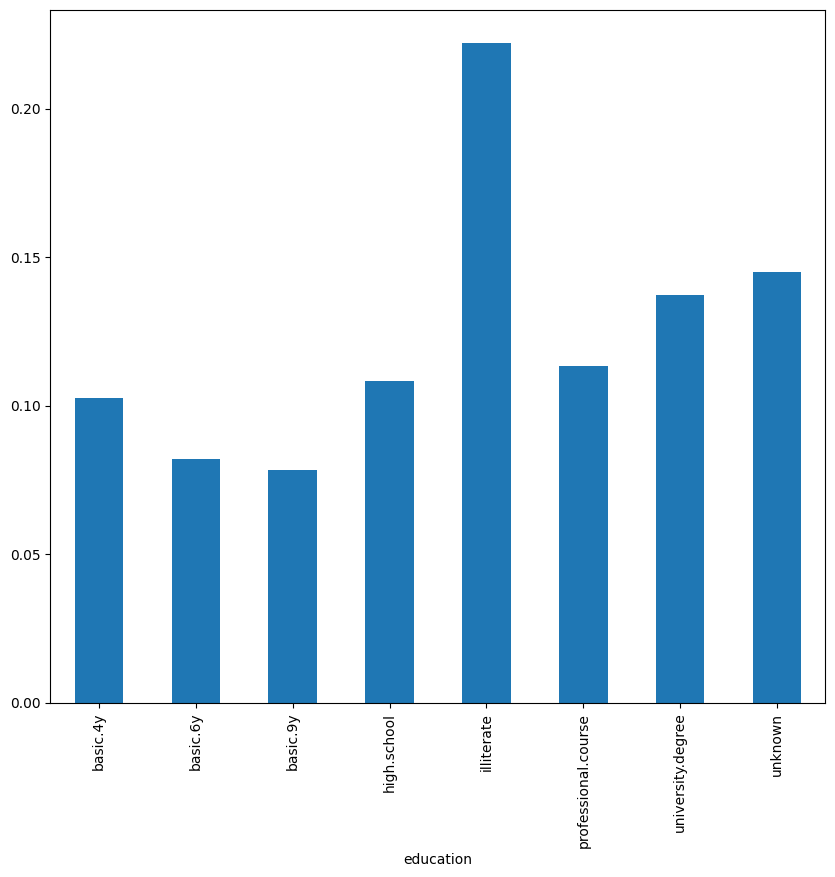

In [28]:
plt.figure(figsize=(10,9))
df.groupby(["education"]).mean()["y_class"].plot(kind="bar")

In [29]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_class'],
      dtype='object')

<AxesSubplot: ylabel='default'>

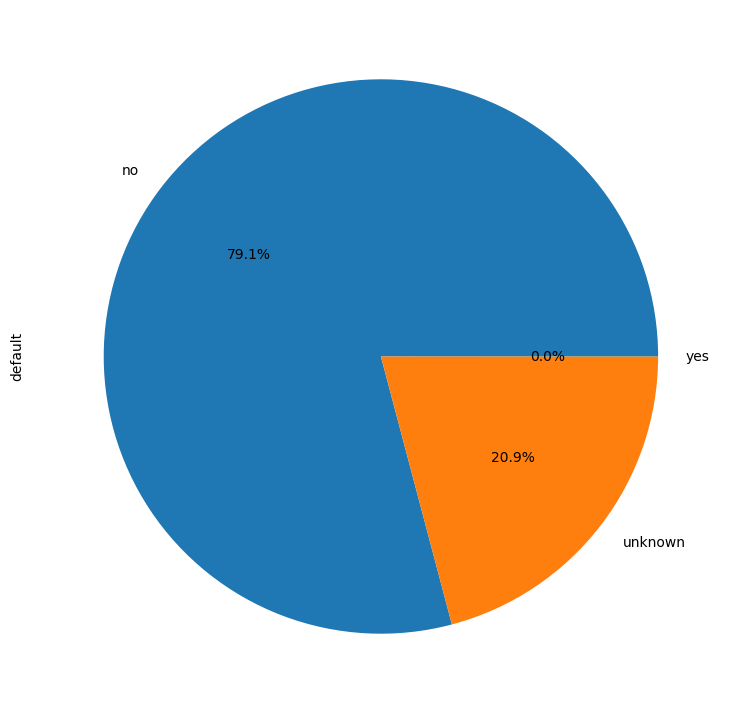

In [30]:
plt.figure(figsize=(10,9))
df["default"].value_counts().plot(kind='pie',autopct='%1.1f%%')

In [31]:
df["default"].unique()

array(['no', 'unknown', 'yes'], dtype=object)

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\587849169.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["default"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='default'>

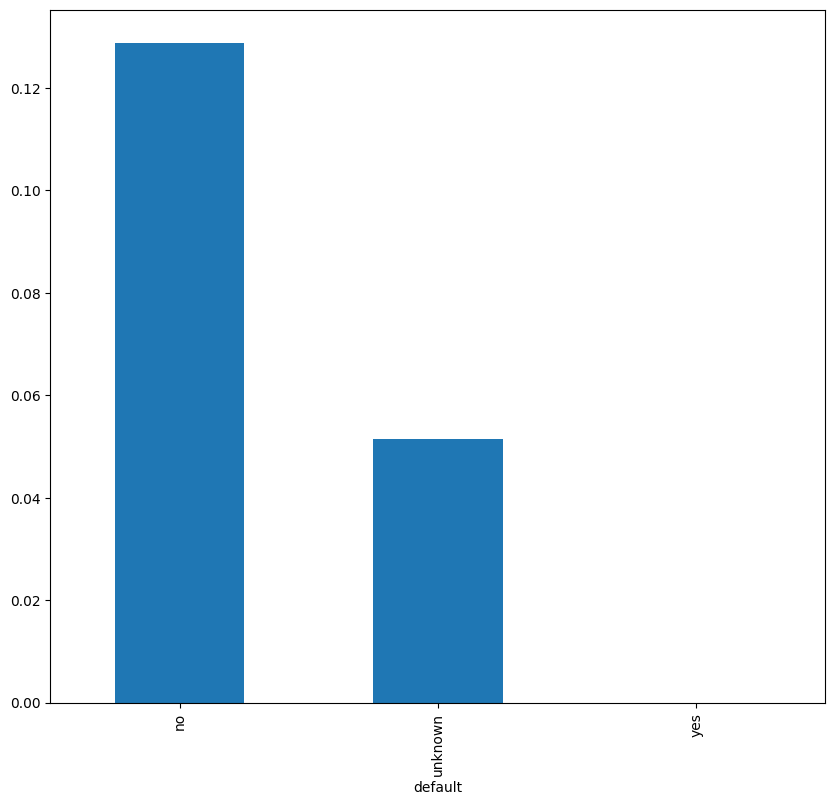

In [32]:
plt.figure(figsize=(10,9))
df.groupby(["default"]).mean()["y_class"].plot(kind="bar")

In [33]:
df["housing"].unique()

array(['no', 'yes', 'unknown'], dtype=object)

<AxesSubplot: ylabel='housing'>

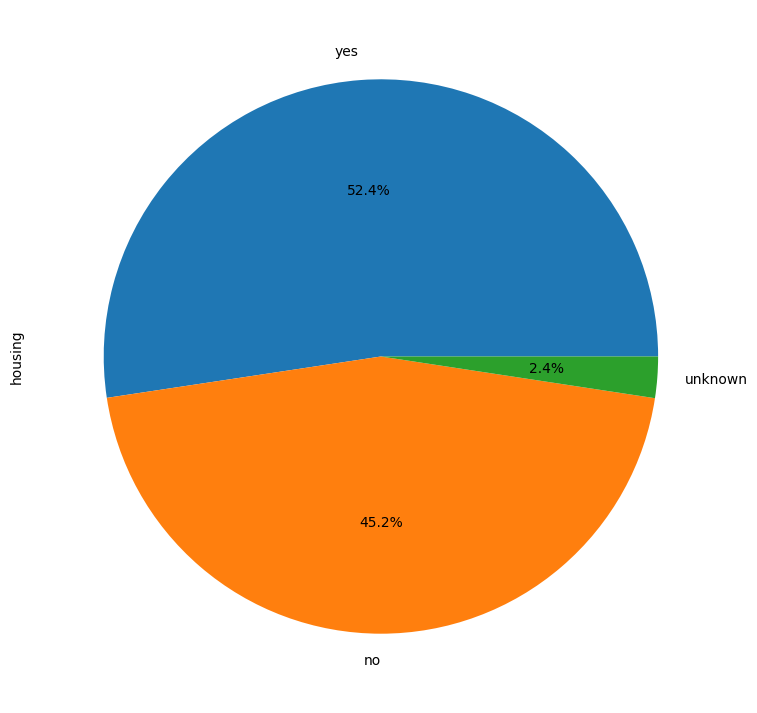

In [34]:
plt.figure(figsize=(10,9))
df["housing"].value_counts().plot(kind='pie',autopct='%1.1f%%')

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\4220009335.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["housing"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='housing'>

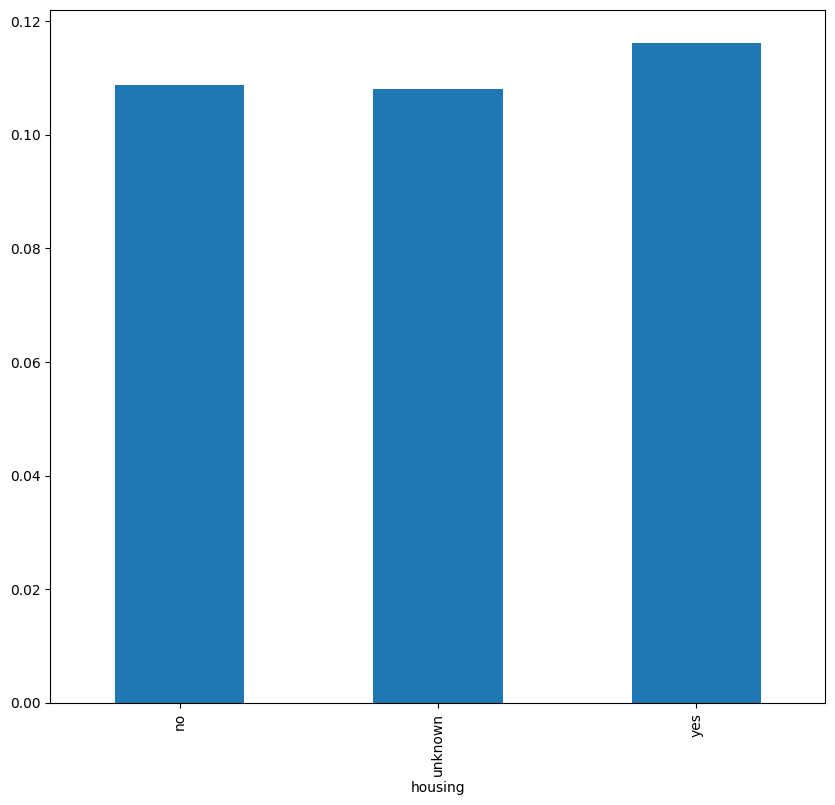

In [35]:
plt.figure(figsize=(10,9))
df.groupby(["housing"]).mean()["y_class"].plot(kind="bar")

In [36]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_class'],
      dtype='object')

<AxesSubplot: ylabel='loan'>

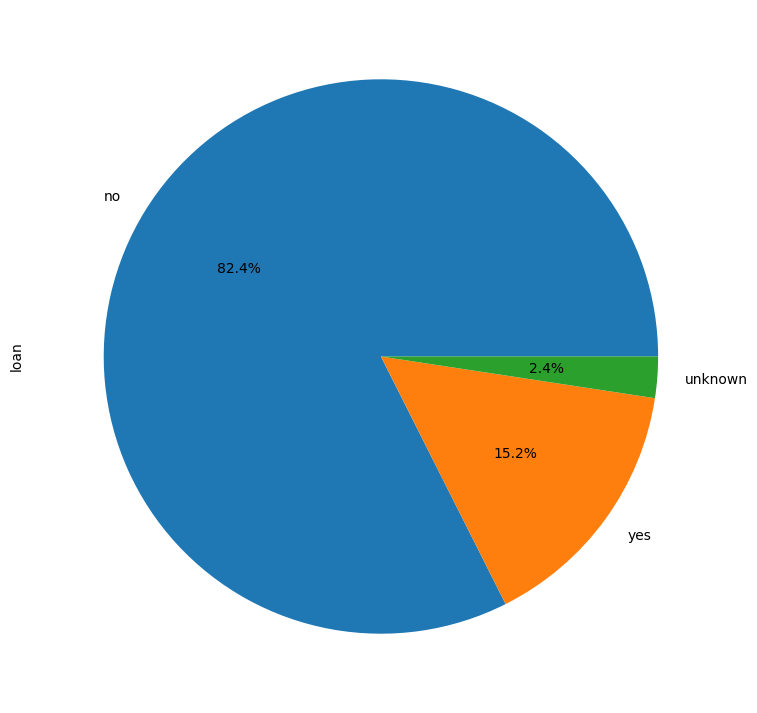

In [37]:
plt.figure(figsize=(10,9))
df["loan"].value_counts().plot(kind='pie',autopct='%1.1f%%')

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\630906010.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["loan"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='loan'>

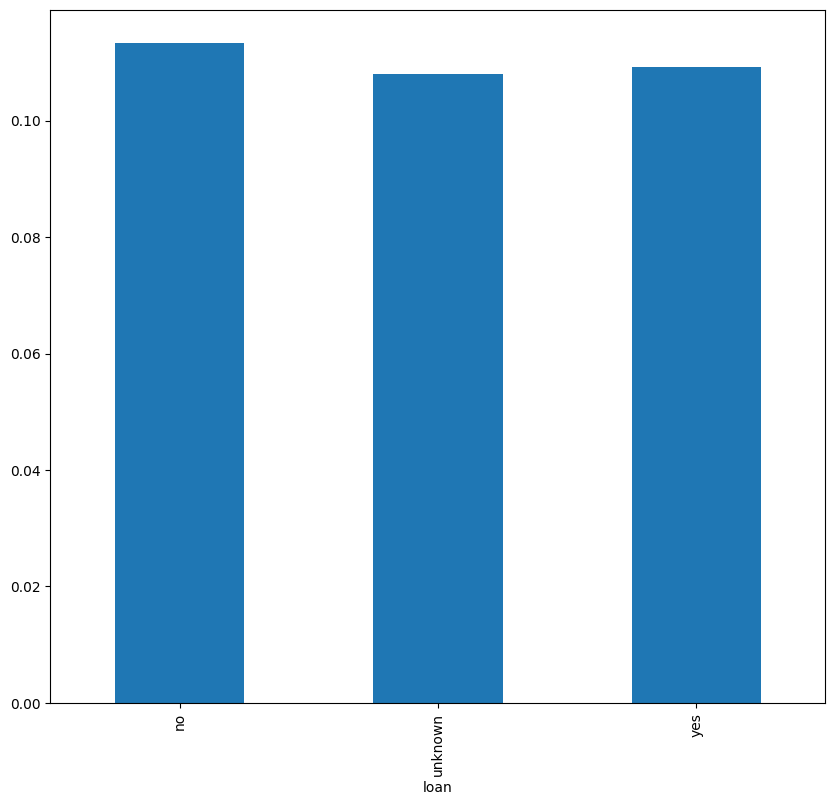

In [38]:
plt.figure(figsize=(10,9))
df.groupby(["loan"]).mean()["y_class"].plot(kind="bar")

In [39]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_class'],
      dtype='object')

<AxesSubplot: ylabel='contact'>

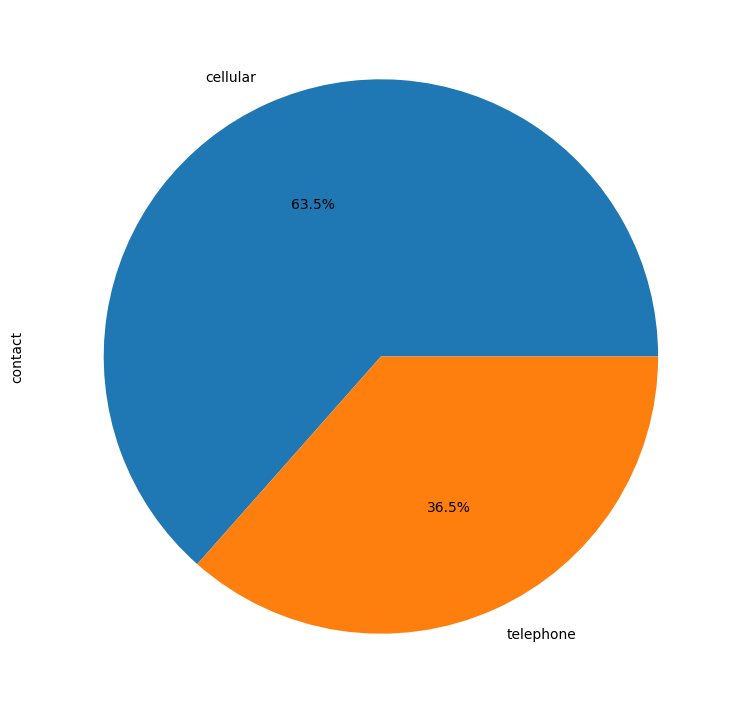

In [40]:
plt.figure(figsize=(10,9))
df["contact"].value_counts().plot(kind="pie",autopct ="%1.1f%%")

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\1794769407.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["contact"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='contact'>

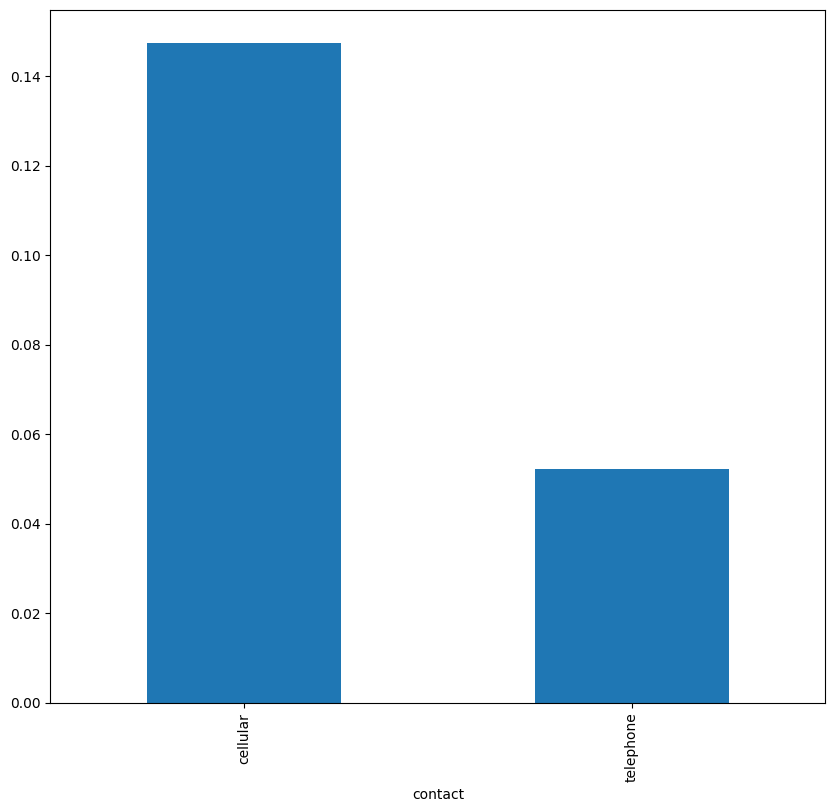

In [41]:
plt.figure(figsize=(10,9))
df.groupby(["contact"]).mean()["y_class"].plot(kind="bar")

In [42]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_class'],
      dtype='object')

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\1509170287.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["day_of_week"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='day_of_week'>

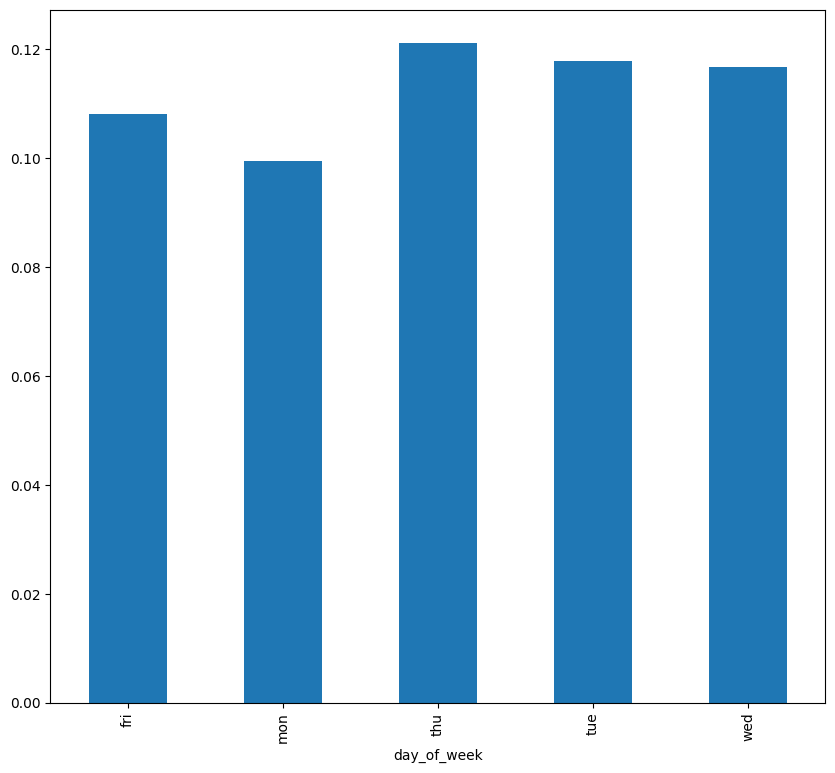

In [43]:
plt.figure(figsize=(10,9))
df.groupby(["day_of_week"]).mean()["y_class"].plot(kind="bar")

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\2898838173.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["month"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='month'>

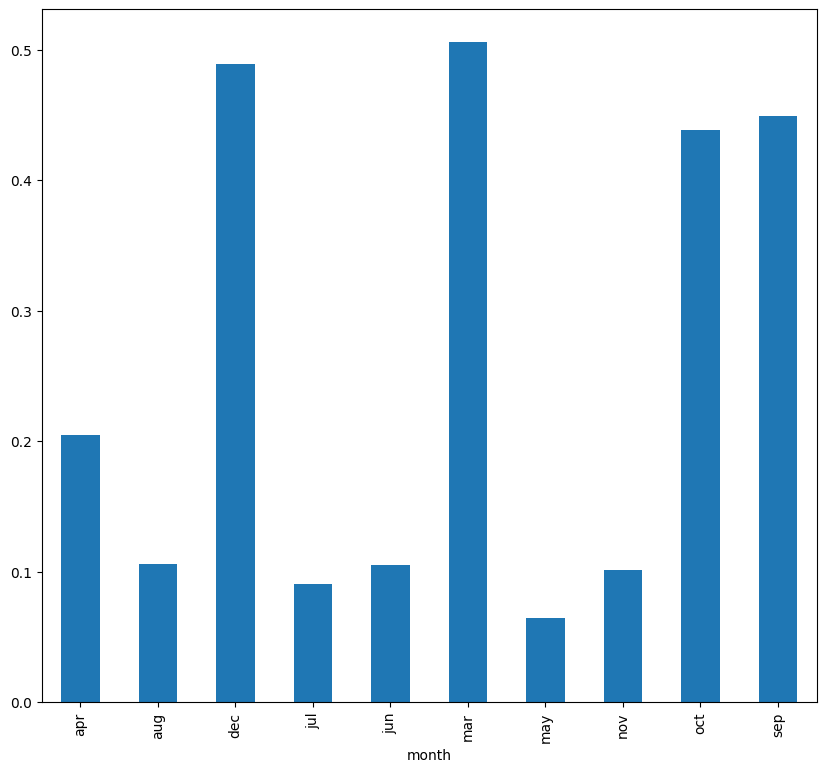

In [44]:
plt.figure(figsize=(10,9))
df.groupby(["month"]).mean()["y_class"].plot(kind="bar")

In [45]:
df.groupby(["y"])["campaign"].mean()

y
no     2.633085
yes    2.051724
Name: campaign, dtype: float64

<AxesSubplot: xlabel='y'>

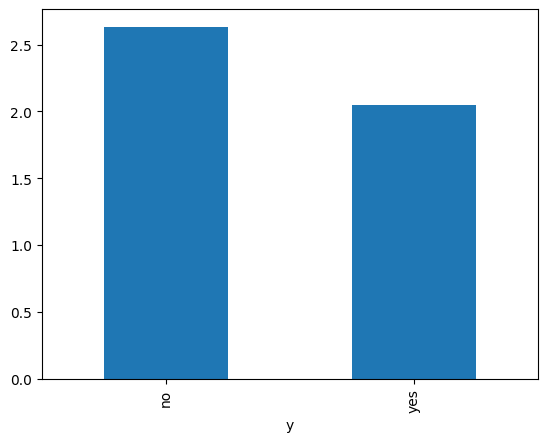

In [46]:
df.groupby(["y"])["campaign"].mean().plot(kind='bar')

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_class'],
      dtype='object')

<AxesSubplot: xlabel='y'>

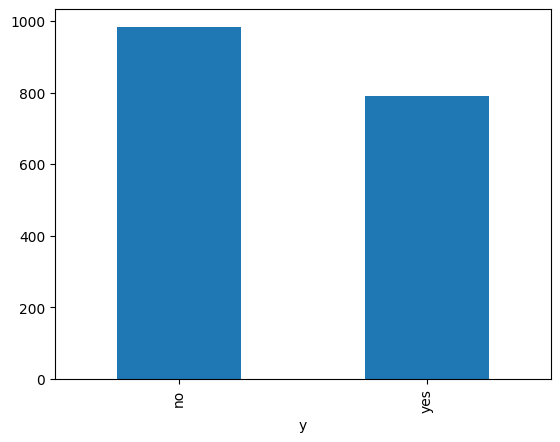

In [48]:
df.groupby(["y"])["pdays"].mean().plot(kind='bar')

C:\Users\mehdi\AppData\Local\Temp\ipykernel_9104\4107270662.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(["poutcome"]).mean()["y_class"].plot(kind="bar")


<AxesSubplot: xlabel='poutcome'>

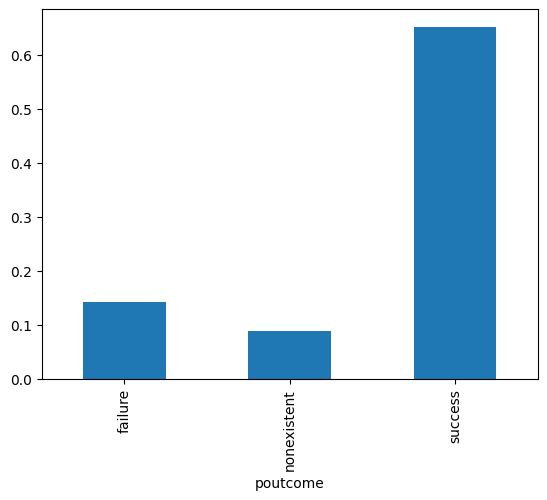

In [49]:
df.groupby(["poutcome"]).mean()["y_class"].plot(kind="bar")

<AxesSubplot: xlabel='y'>

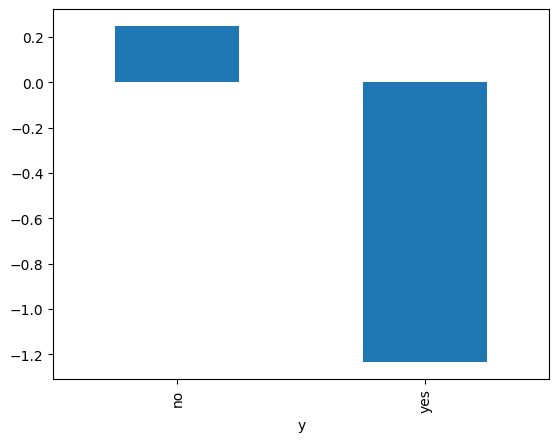

In [50]:
df.groupby(["y"])["emp.var.rate"].mean().plot(kind='bar')

<AxesSubplot: xlabel='y'>

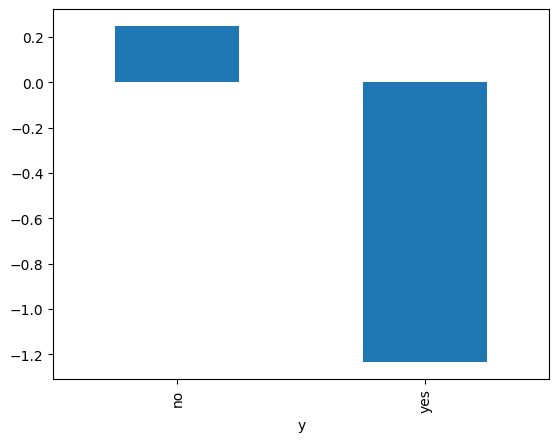

In [51]:
df.groupby(["y"])["emp.var.rate"].mean().plot(kind='bar')

In [52]:
df.groupby(["y"])["cons.conf.idx"].mean()

y
no    -40.593097
yes   -39.789784
Name: cons.conf.idx, dtype: float64

<AxesSubplot: xlabel='y'>

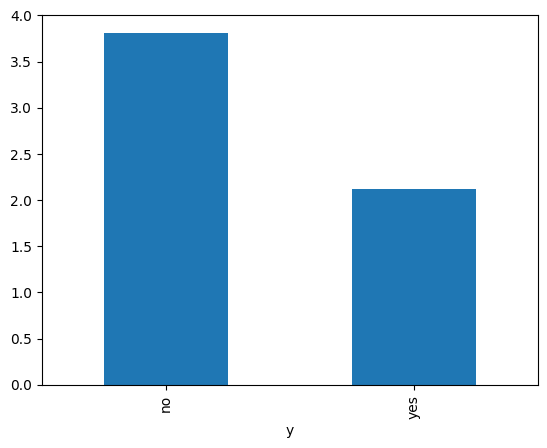

In [53]:
df.groupby(["y"])["euribor3m"].mean().plot(kind='bar')

<AxesSubplot: xlabel='y'>

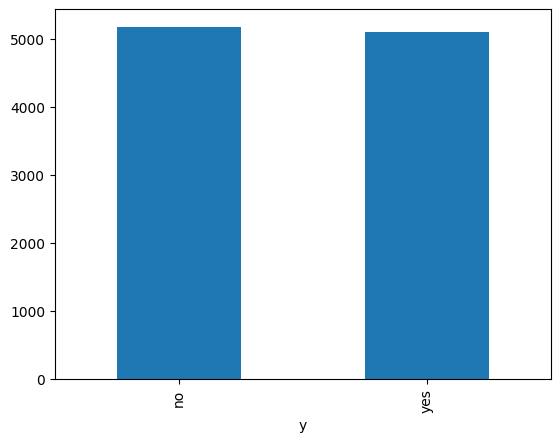

In [54]:
df.groupby(["y"])["nr.employed"].mean().plot(kind='bar')

In [55]:
df.to_csv("data.csv")

In [56]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_class
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


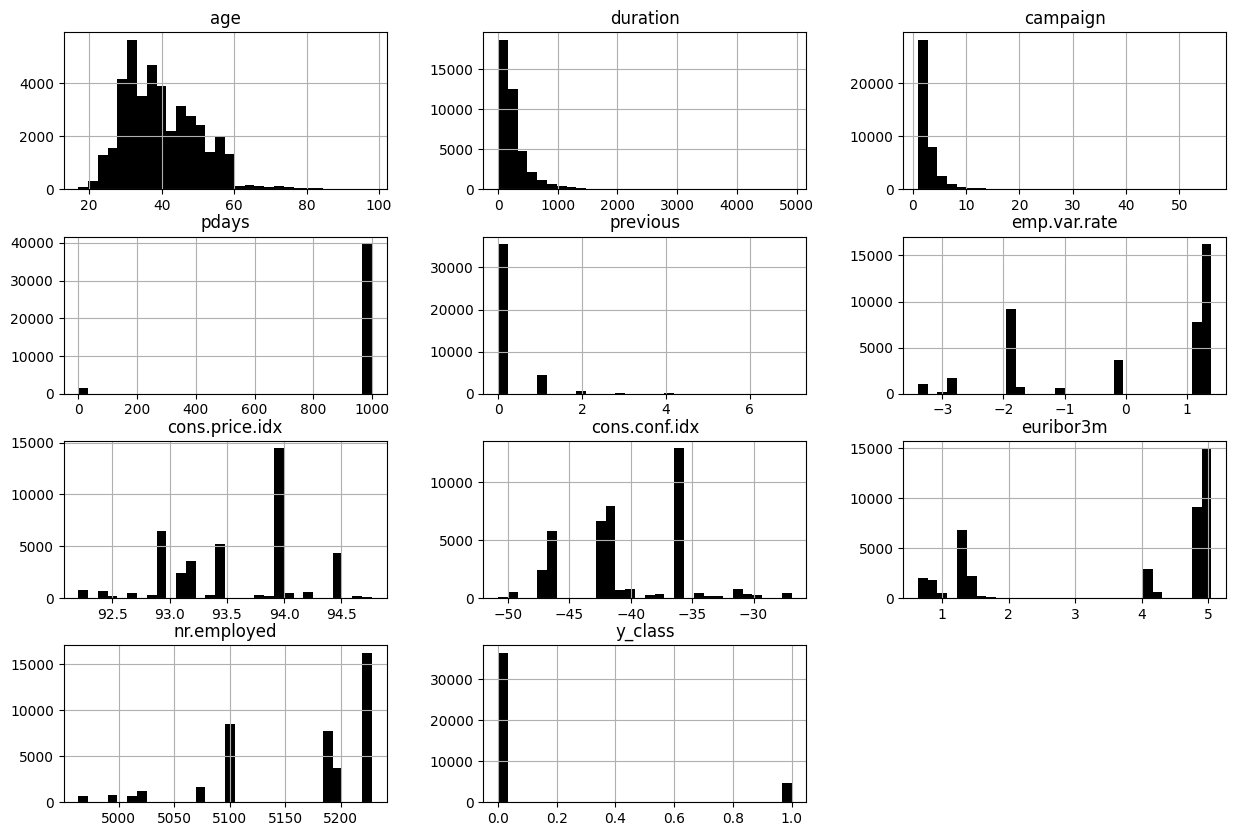

In [57]:
df.hist(color = "k",
        bins = 30,
        figsize = (15, 10))
plt.show()

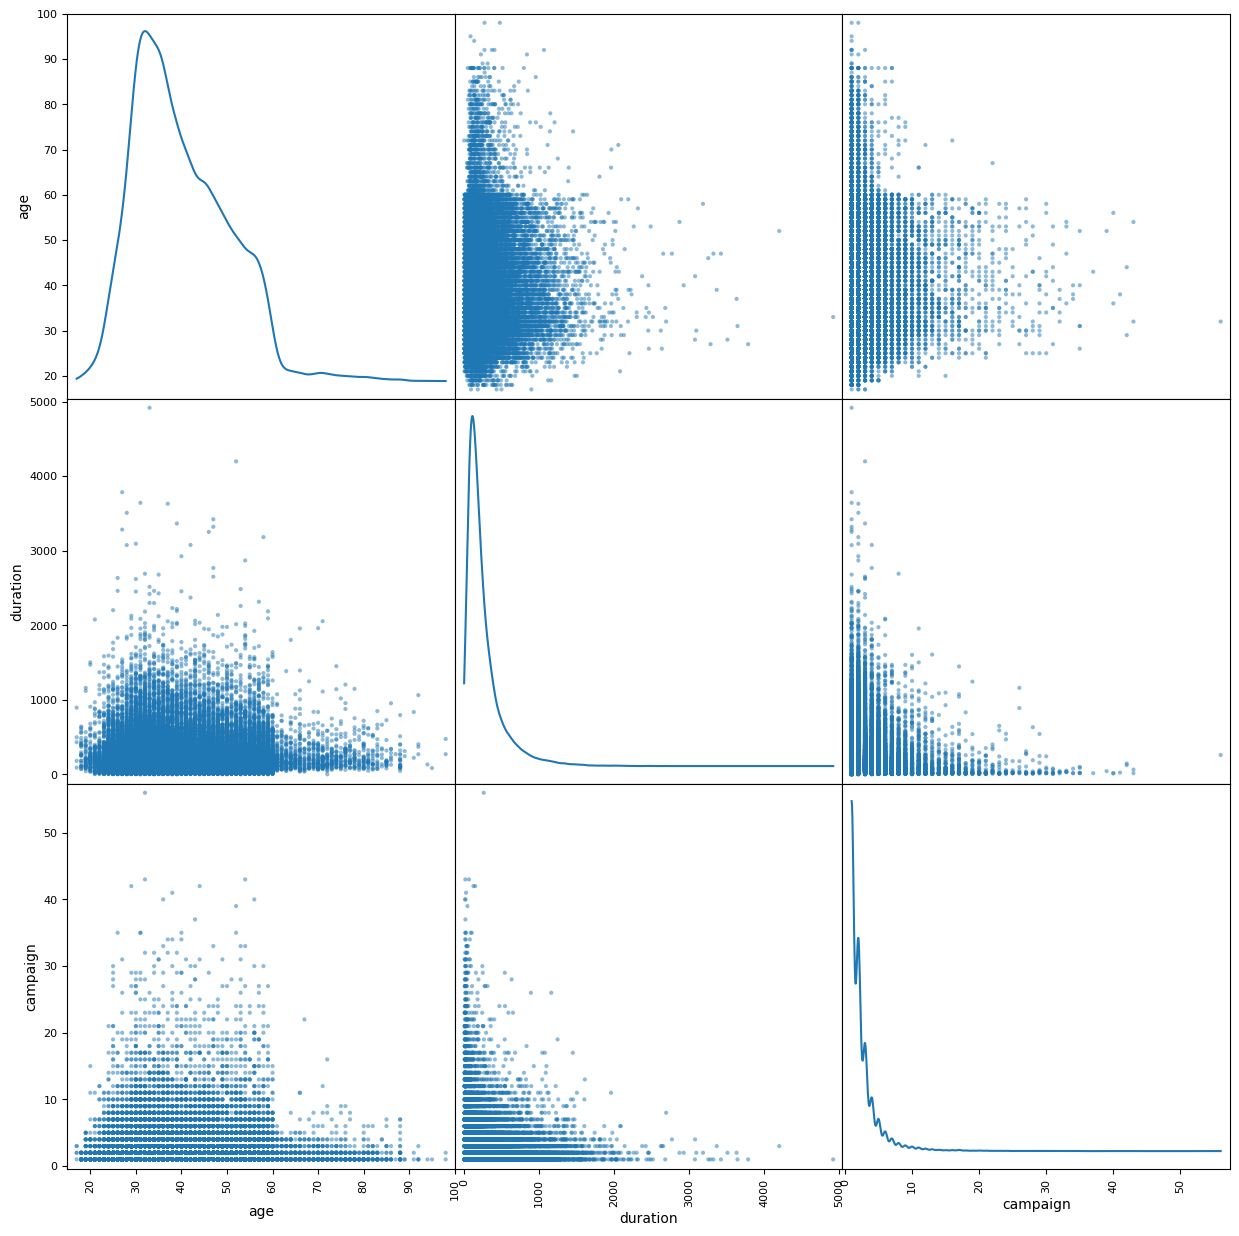

In [58]:
pd.plotting.scatter_matrix(
    df[["age", "duration", "campaign"]],
    figsize = (15, 15),
    diagonal = "kde")
plt.show()

In [59]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y_class
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [60]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'y_class'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [63]:
df.to_csv("Dataset/data.csv")